# Deep learning basic

## Neural network
Neural networks, also known as artificial neural networks (ANNs) , are a subset of machine learning and are at the heart of **deep learning** algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

<img src="https://d35fo82fjcw0y8.cloudfront.net/2019/04/08023413/Neural_Network_Brain_Mimic.jpeg" width="800" >

**What will be next**

<img src="https://miro.medium.com/v2/resize:fit:1352/format:webp/1*nEooKljI8XbKQh4cFbZu1Q.png" width=500>

**Single-layer Neural Network**

A single-layer neural network will be used to solve the problem.

<img src="https://adatis.co.uk/wp-content/uploads/Schema-of-neuron.jpg">

\begin{align}
y = f( \sum_{i=1}^n w_ix_i + b) 
        \text{   where $x_i$ : } & \left. input_i \right. \\[0em]
        \text{$w_i$: } &\text{weight of } input_i \\[0em]
        \text{$b$: } &  \text{biais}
\end{align}


**Loss function**

$L=(\text{output} -f(x))^{2}$

<a href="https://medium.com/technology-invention-and-more/how-to-build-a-simple-neural-network-in-9-lines-of-python-code-cc8f23647ca1">Reference : How to build a simple neural network in 9 lines of Python code</a>



In [1]:
from numpy import exp, array, random, dot
training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T
print(training_set_inputs)
print(training_set_outputs)



[[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
[[0]
 [1]
 [1]
 [0]]


In [2]:
random.seed(1)
synaptic_weights = 2 * random.random((3, 1)) - 1
print(synaptic_weights)
print (1 / (1 + exp(-(dot(array([1, 1, 1]), synaptic_weights)))))   # Output

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
[0.3262757]


Validation loss is a metric used to assess the performance of a deep learning model on the validation set. 



In [3]:
err=0
for i in range(len(training_set_outputs)):
  y=(1 / (1 + exp(-(dot(array(training_set_inputs[i]), synaptic_weights)))))
  diff=y-training_set_outputs[i]
  err=diff*diff+err
  print(diff)
print(err)

[0.2689864]
[-0.6737243]
[-0.76237183]
[0.36375058]
[1.2397834]


In [4]:
output = 1 / (1 + exp(-(dot(training_set_inputs, synaptic_weights))))
synaptic_weights += dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))


In [5]:
# Training process
for iteration in range(10000):
    output = 1 / (1 + exp(-(dot(training_set_inputs, synaptic_weights))))
    synaptic_weights += dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))

print(synaptic_weights)


[[ 9.67309547]
 [-0.20784326]
 [-4.62968811]]


In [6]:
print (1 / (1 + exp(-(dot(array([1, 1, 1]), synaptic_weights)))))

[0.99212037]


In [7]:
err=0
for i in range(len(training_set_outputs)):
  y=(1 / (1 + exp(-(dot(array(training_set_inputs[i]), synaptic_weights)))))
  diff=y-training_set_outputs[i]
  err=diff*diff+err
  print(diff)
print(err)

[0.00966351]
[-0.00787963]
[-0.00641037]
[0.00786426]
[0.00025841]


# Predict the future - function modeling

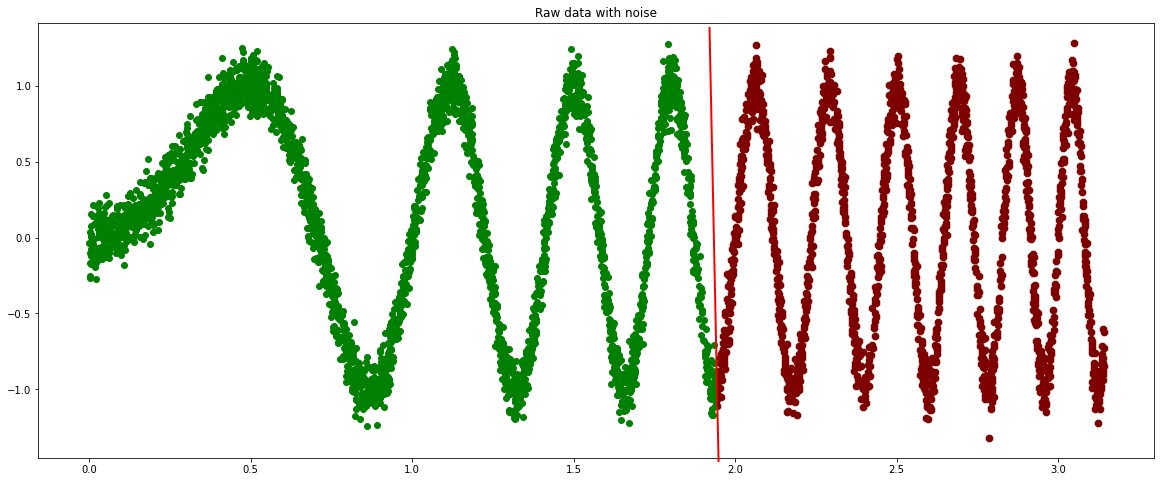

##Testing function

>$y=A\times sin(2\times \pi \times t^2)$

In [8]:
def f(x):
  print(x.shape)
  return np.sin(2*np.pi*x**2 )+ 0.1*np.random.randn(x.shape[0])

Raw data generation (with noise)

(4000,)


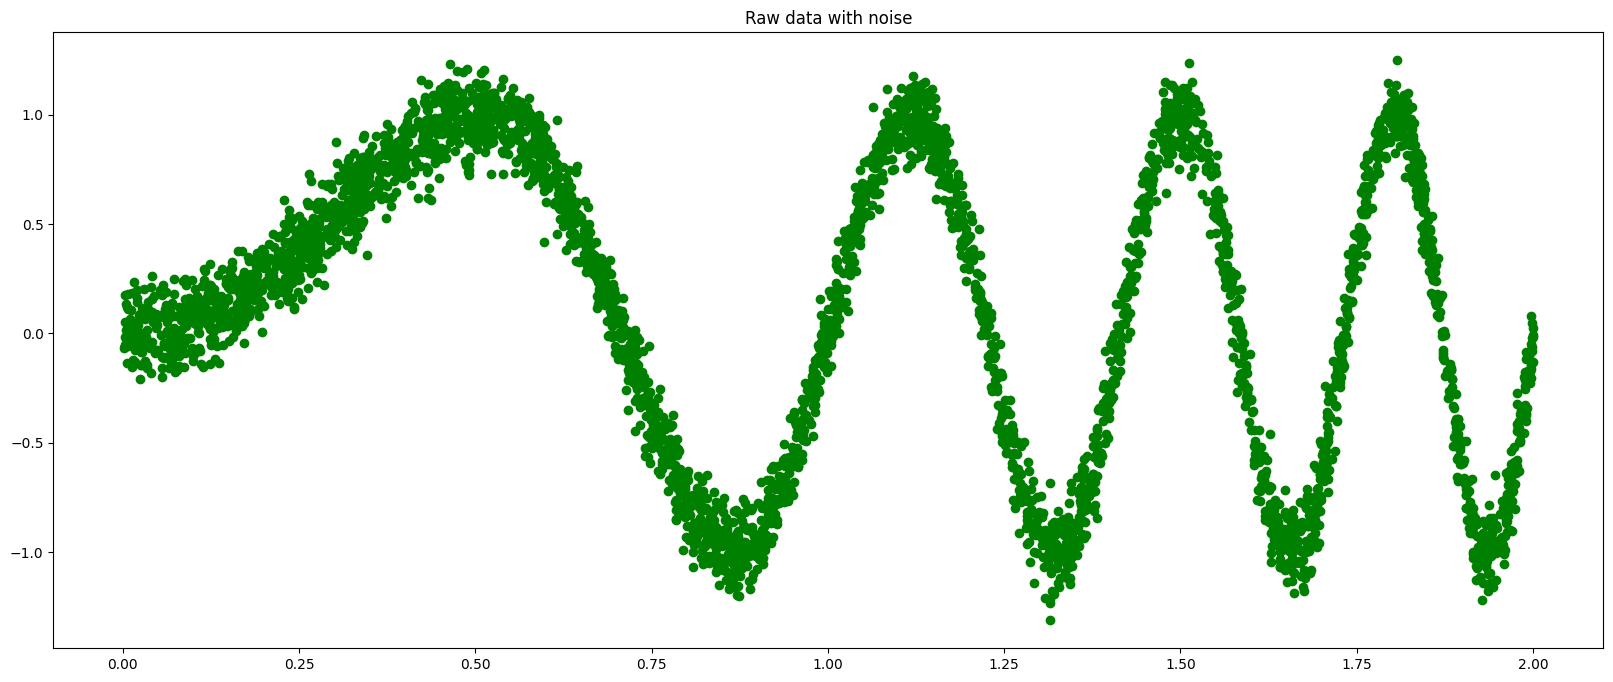

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

num_examples = 4000
np.random.seed(1000)
training_range=2
#np.random.unitorm(low,high,size)
all_x = np.random.uniform(0*np.pi,training_range, num_examples).T
fig = plt.figure(figsize=(20,8))
plt.title('Raw data with noise')
plt.scatter(all_x, f(all_x), color='g')

### Python Modules
* numpy
* <a ref=https://matplotlib.org/matplotlib> matplotlib </a>

**Matplotlib - Visualization with Python**

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

* `matplotlib.pyplot` is an interface to matplotlib. It provides an implicit way of plotting.

* `plt.figure`  is used to create a new figure.

* `plt.scatter` is to create a scatter plot of y vs. x with varying marker size and/or color. 

## Regression analysis - Polyfit
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable and one or more independent variables. Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

$$y= \beta_{0} + \beta_{1}x + \beta_{2}x^{2} + ....+\beta_{n}x^{n} $$


polyfit() method takes a few parameters and returns a vector of coefficients p that minimizes the squared error in the order n, n-1, … 0. It least squares the polynomial fit. It fits a polynomial p(X) of degree deg to points (X, Y).

In [10]:
print("x=",all_x[0],",y=", f(all_x)[0])
print("x=",all_x[1],",y=", f(all_x)[1])
print("x=",all_x[2],",y=", f(all_x)[2])

(4000,)
x= 1.307179170929219 ,y= -0.9201834341251868
(4000,)
x= 0.23001388624881147 ,y= 0.26012168486086845
(4000,)
x= 1.900565728698049 ,y= -0.758258064912254


(4000,)
(4000,)


/usr/local/lib/python3.10/dist-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


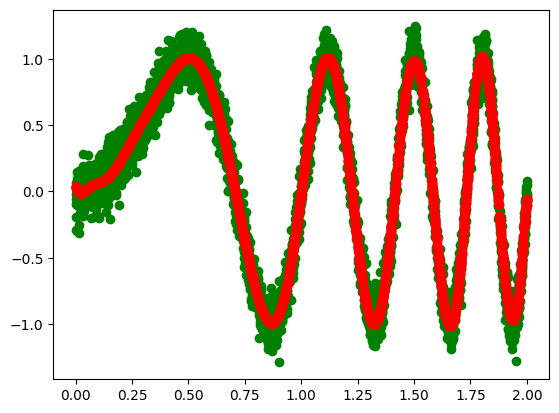

In [11]:
from numpy.polynomial import polynomial as P
eq2 = P.polyfit(all_x, f(all_x),30)
y2 = P.polyval(all_x,eq2)
plt.scatter(all_x, f(all_x), color='g')
plt.scatter(all_x, y2, color='r')
plt.show()

In [12]:
print(eq2)

[ 5.47233539e-02 -7.88051823e+00  3.07647032e+02 -5.06453999e+03
  4.59466852e+04 -2.51933532e+05  8.88895575e+05 -2.07864058e+06
  3.21761189e+06 -3.14701751e+06  1.63231223e+06 -5.01945100e+04
 -3.72794528e+05  5.67513140e+04  8.91463826e+04 -4.60931985e+03
 -2.21514996e+04 -4.13904952e+03  4.13930718e+03  2.30797155e+03
 -2.05107249e+02 -6.28733330e+02 -1.77960088e+02  8.90037023e+01
  7.34774668e+01  3.60409298e-01 -1.82533787e+01 -2.70828626e+00
  4.95723247e+00 -1.23968954e+00  9.21446936e-02]


(4000,)


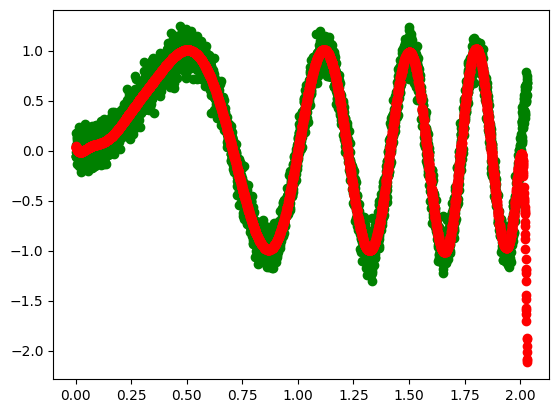

In [13]:
num_examples = 4000
np.random.seed(1000)
#np.random.unitorm(low,high,size)
predict_range=2.03
all_x = np.random.uniform(0*np.pi,predict_range, num_examples).T
y2 = P.polyval(all_x,eq2)
plt.scatter(all_x, f(all_x), color='g')
plt.scatter(all_x, y2, color='r')
plt.show()

##Neural Networks for Function Approximation

[Explained In A Minute: Neural Networks](https://youtu.be/rEDzUT3ymw4)



###Import necessary python libraries

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Setup basic training parameters

In [15]:
training_epochs = 500
test_fraction = 0.75


###Create a 11-hidden layers MLP

*Try use different number of layers to perform better performance

In [16]:
model = Sequential()

neurons = 100

model.add(Dense(1, input_dim=1, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='tanh', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(neurons, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(1, activation='tanh', kernel_initializer='random_normal'))

**Dense layer** is the regular deeply connected neural network layer. It is most common and frequently used layer. Dense layer does the below operation on the input and return the output.

***output = activation(dot(input, kernel) + bias)***
where,

* input represent the input data

* kernel represent the weight data

* dot represent numpy dot product of all input and its corresponding weights

* bias represent a biased value used in machine learning to optimize the model

* activation represent the activation function.

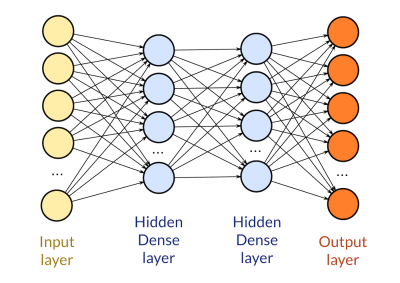

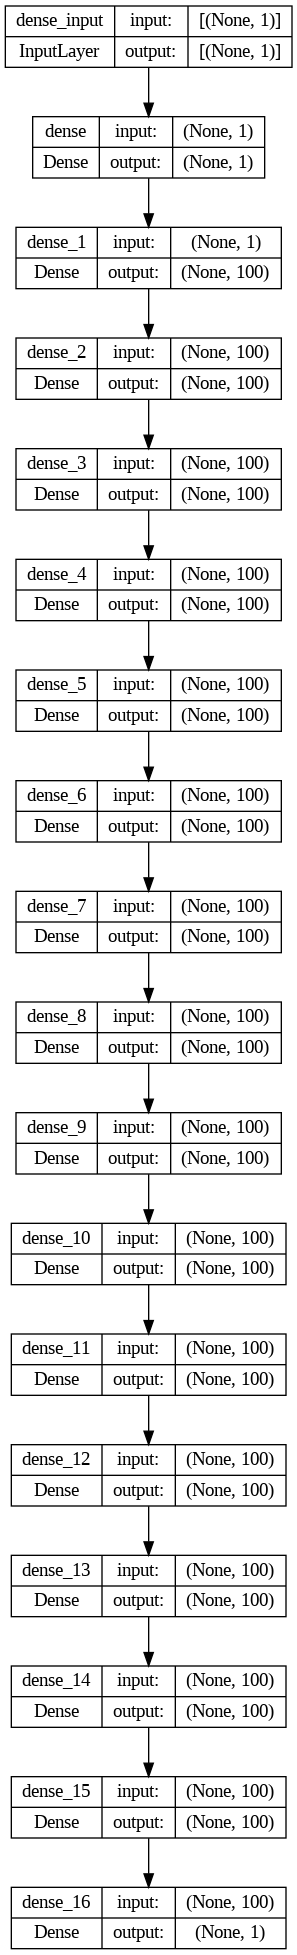

In [17]:
keras.utils.plot_model(model, show_shapes=True)

###Prepare training and testing dataset

In [18]:
np.random.shuffle(all_x)
train_size = int(num_examples*test_fraction)

# Partition data
x_training = all_x[:train_size]
x_testing = all_x[train_size:]
y_training = f(x_training)
y_testing = f(x_testing)

(3000,)
(1000,)


### Plot the testing and training data

<Figure size 640x480 with 0 Axes>

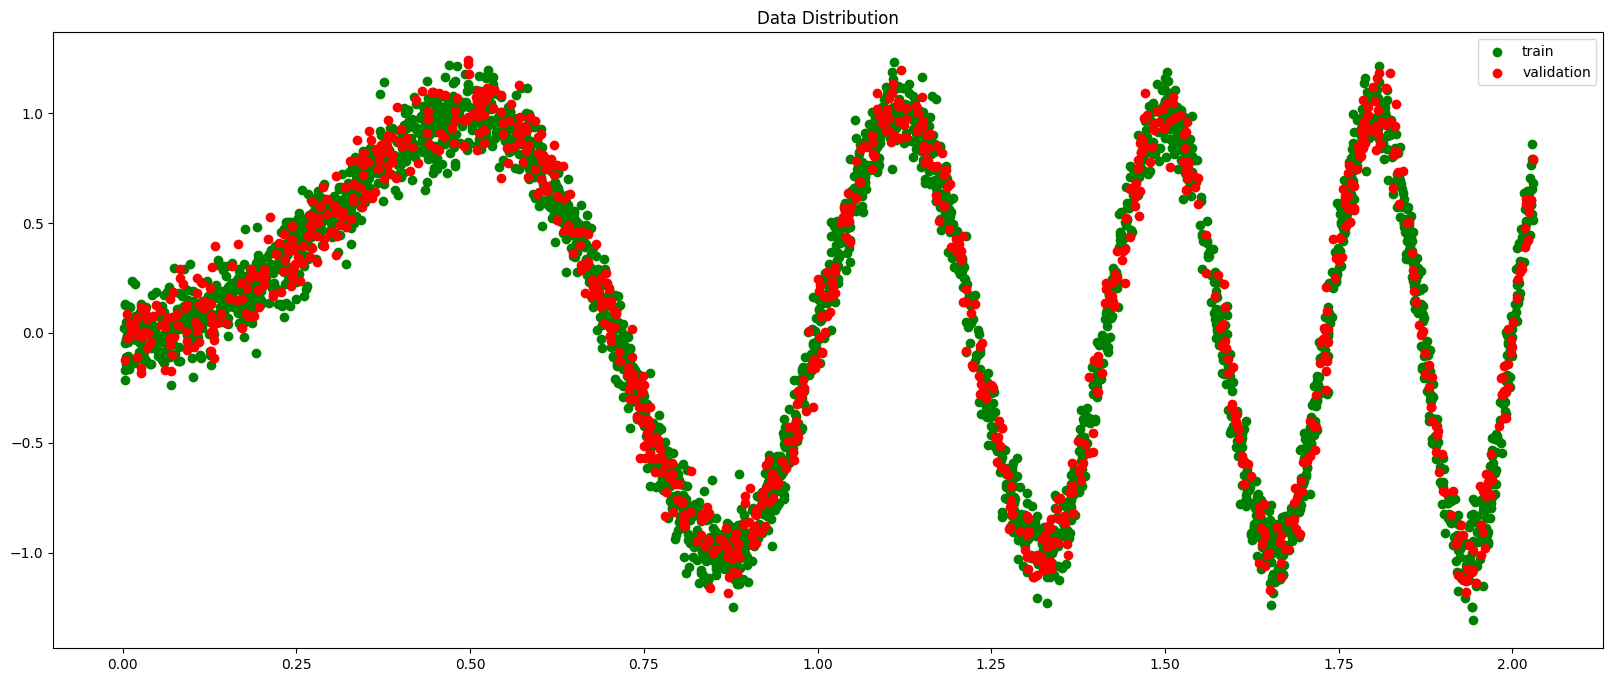

In [19]:
plt.figure(1)
fig = plt.figure(figsize=(20,8))
plt.title('Data Distribution')
plt.scatter(x_training, y_training, c='green', label='train')
plt.scatter(x_testing, y_testing, c='red', label='validation')
plt.legend()

### Starts training

In [20]:
loss_function = tf.keras.losses.MeanSquaredError()

model.compile(loss=loss_function, optimizer='adam')



### Fitting the data to the training data sets

Epoch 1/1000
3/3 - 12s - loss: 0.4629 - 12s/epoch - 4s/step
Epoch 2/1000
3/3 - 0s - loss: 0.4607 - 247ms/epoch - 82ms/step
Epoch 3/1000
3/3 - 0s - loss: 0.4579 - 287ms/epoch - 96ms/step
Epoch 4/1000
3/3 - 0s - loss: 0.4550 - 200ms/epoch - 67ms/step
Epoch 5/1000
3/3 - 0s - loss: 0.4505 - 252ms/epoch - 84ms/step
Epoch 6/1000
3/3 - 0s - loss: 0.4540 - 219ms/epoch - 73ms/step
Epoch 7/1000
3/3 - 0s - loss: 0.4508 - 255ms/epoch - 85ms/step
Epoch 8/1000
3/3 - 0s - loss: 0.4512 - 273ms/epoch - 91ms/step
Epoch 9/1000
3/3 - 0s - loss: 0.4516 - 223ms/epoch - 74ms/step
Epoch 10/1000
3/3 - 0s - loss: 0.4515 - 257ms/epoch - 86ms/step
Epoch 11/1000
3/3 - 0s - loss: 0.4512 - 252ms/epoch - 84ms/step
Epoch 12/1000
3/3 - 0s - loss: 0.4511 - 191ms/epoch - 64ms/step
Epoch 13/1000
3/3 - 0s - loss: 0.4510 - 182ms/epoch - 61ms/step
Epoch 14/1000
3/3 - 0s - loss: 0.4509 - 248ms/epoch - 83ms/step
Epoch 15/1000
3/3 - 0s - loss: 0.4509 - 244ms/epoch - 81ms/step
Epoch 16/1000
3/3 - 0s - loss: 0.4509 - 235ms/epoch 

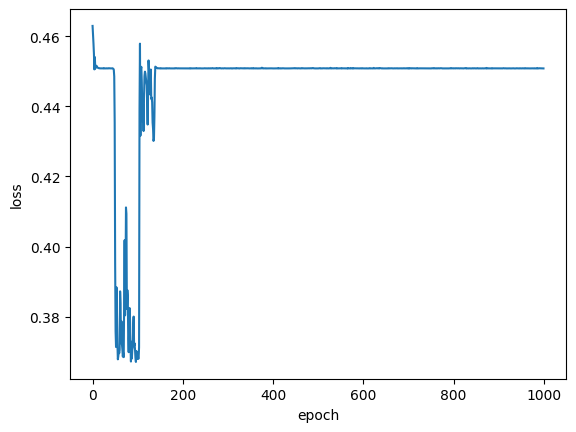

In [21]:
# fit the model on the training dataset
training_epochs=1000
history = model.fit(x_training, y_training, epochs=training_epochs, batch_size=1000, verbose=2)

print()
print("History keys are following: ")
print(history.history.keys())
print()

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Test the result

125/125 [==============================] - 0s 2ms/step
(4000,)


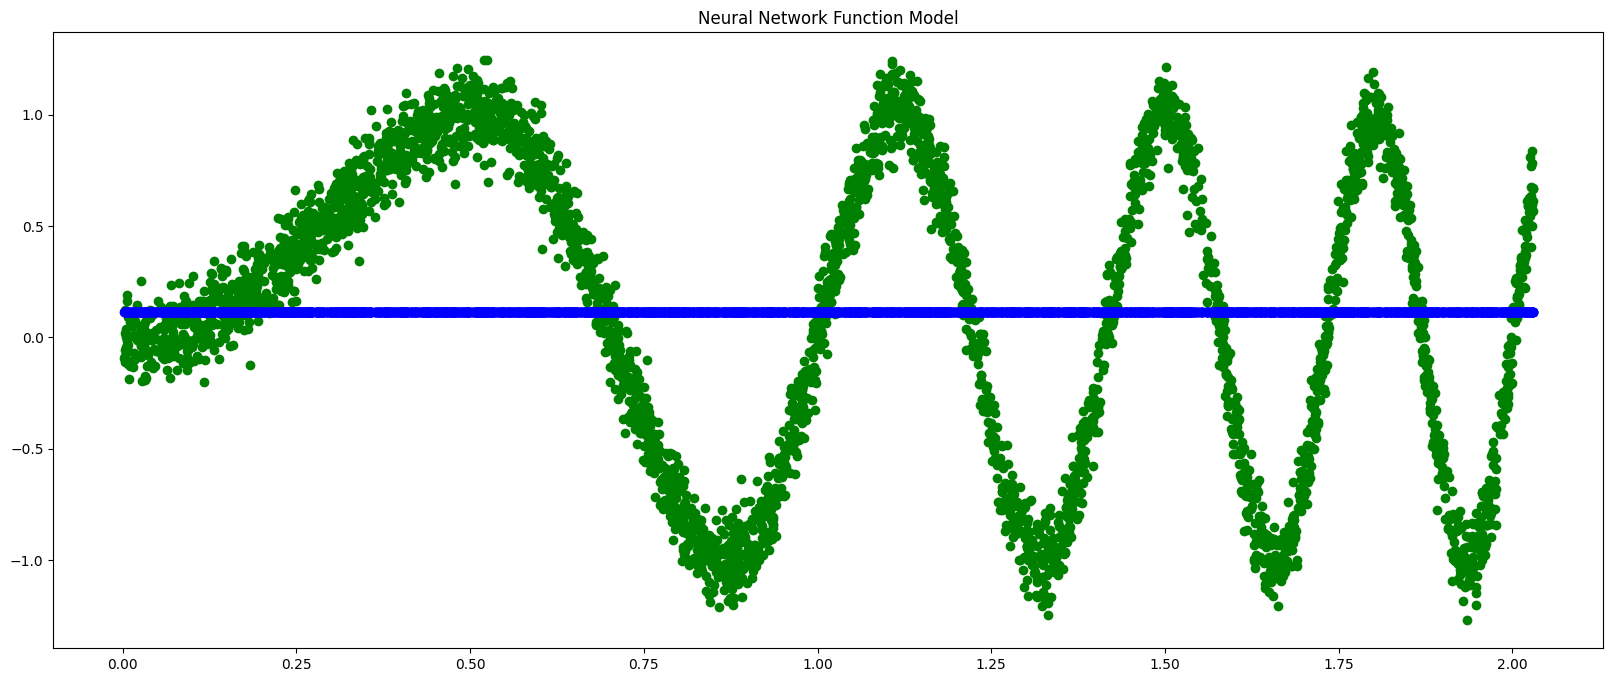

In [22]:
y_pred = model.predict(all_x)

fig = plt.figure(figsize=(20,8))
plt.title('Neural Network Function Model')
plt.scatter(all_x,f(all_x), color='g', label='Experimental Data')
plt.scatter(all_x,y_pred, color='b', label='AI Prediction')

*** Predict the future ***

125/125 [==============================] - 0s 2ms/step
(4000,)


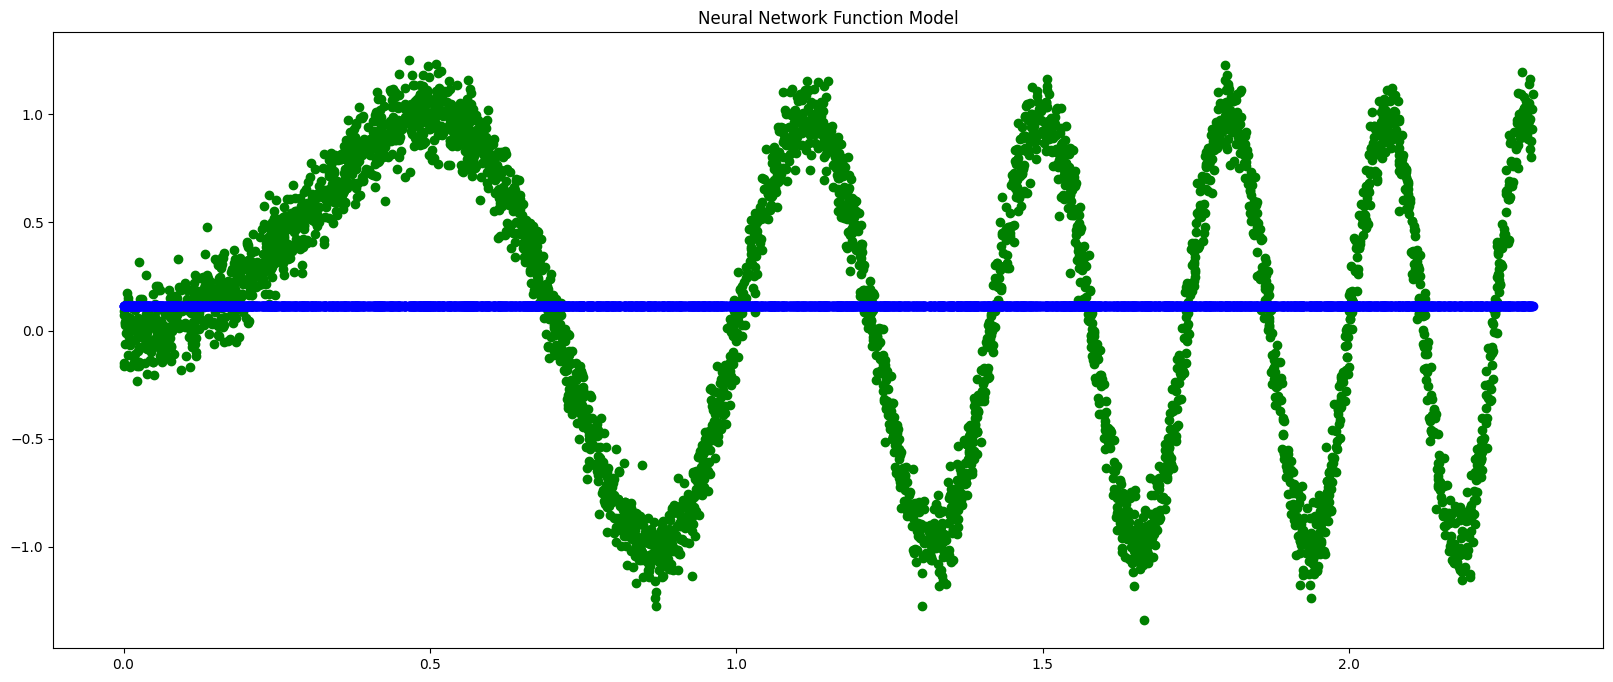

In [23]:
all_x2 = np.random.uniform(0*np.pi,2.3, num_examples).T
y_pred = model.predict(all_x2)

fig = plt.figure(figsize=(20,8))
plt.title('Neural Network Function Model')
plt.scatter(all_x2,f(all_x2), color='g', label='Experimental Data')
plt.scatter(all_x2,y_pred, color='b', label='AI Prediction')